In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv(r"C:\\Users\\katta\\Chandapur_Lake_Water_Quality_Prediction\\outputs\\cleaned_chandapur_lake_water_quality.csv")

In [34]:
# 3️⃣ Statistical Summary
print("\nStatistical Summary:")
display(df.describe())



Statistical Summary:


,pH,Conductivity (micro;mho/cm),BOD (mg/L),Nitrate (N) (mg/L),Fecal coliform (MPN/100ml),Total coliform (MPN/100ml),Bicarbonate (HCO3),Turbidity (mg/L),Total Alkalinity (mg/L),Chlorides (mg/L),COD (mg/L),Ammonical-N (mg/L),Total Hardness (mg/L),Ca as CaCo3 (mg/L),Mg as CaCo3 (mg/L),Sodium (mg/l),Total Dissolved Solids (mg/L),Potassium (mg/L)
count,23.000000,23.000000,23.000000,23.000000,2.300000e+01,2.300000e+01,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,7.312609,1934.260870,37.913043,6.638261,9.475913e+04,5.275652e+05,452.000000,23.856522,452.000000,334.782609,236.521739,21.252174,509.913043,286.173913,269.434783,180.086957,1300.652174,31.608696
std,0.381888,467.852465,23.003780,2.523278,2.303475e+05,1.166900e+06,148.368093,18.094897,148.368093,110.597944,82.376558,16.310936,162.681483,125.096200,82.306979,53.495041,294.333393,13.756781
min,6.800000,705.000000,5.000000,0.700000,2.100000e+02,1.200000e+03,84.000000,3.900000,84.000000,100.000000,56.000000,0.590000,68.000000,96.000000,84.000000,68.000000,474.000000,11.000000
25%,6.950000,1735.000000,25.500000,5.325000,2.100000e+03,1.500000e+04,390.000000,11.300000,390.000000,322.000000,198.000000,7.600000,472.000000,240.000000,244.000000,162.000000,1178.000000,25.000000
50%,7.300000,1948.000000,34.000000,7.200000,1.700000e+04,7.000000e+04,444.000000,20.100000,444.000000,360.000000,244.000000,21.400000,544.000000,280.000000,268.000000,172.000000,1354.000000,30.000000
75%,7.650000,2205.000000,45.000000,8.500000,1.010000e+05,3.650000e+05,576.000000,31.300000,576.000000,406.000000,284.500000,30.500000,592.000000,314.000000,304.000000,200.000000,1494.000000,38.000000
max,8.000000,2880.000000,98.000000,11.000000,1.100000e+06,4.900000e+06,684.000000,80.400000,684.000000,476.000000,372.000000,61.000000,716.000000,760.000000,498.000000,290.000000,1736.000000,76.000000


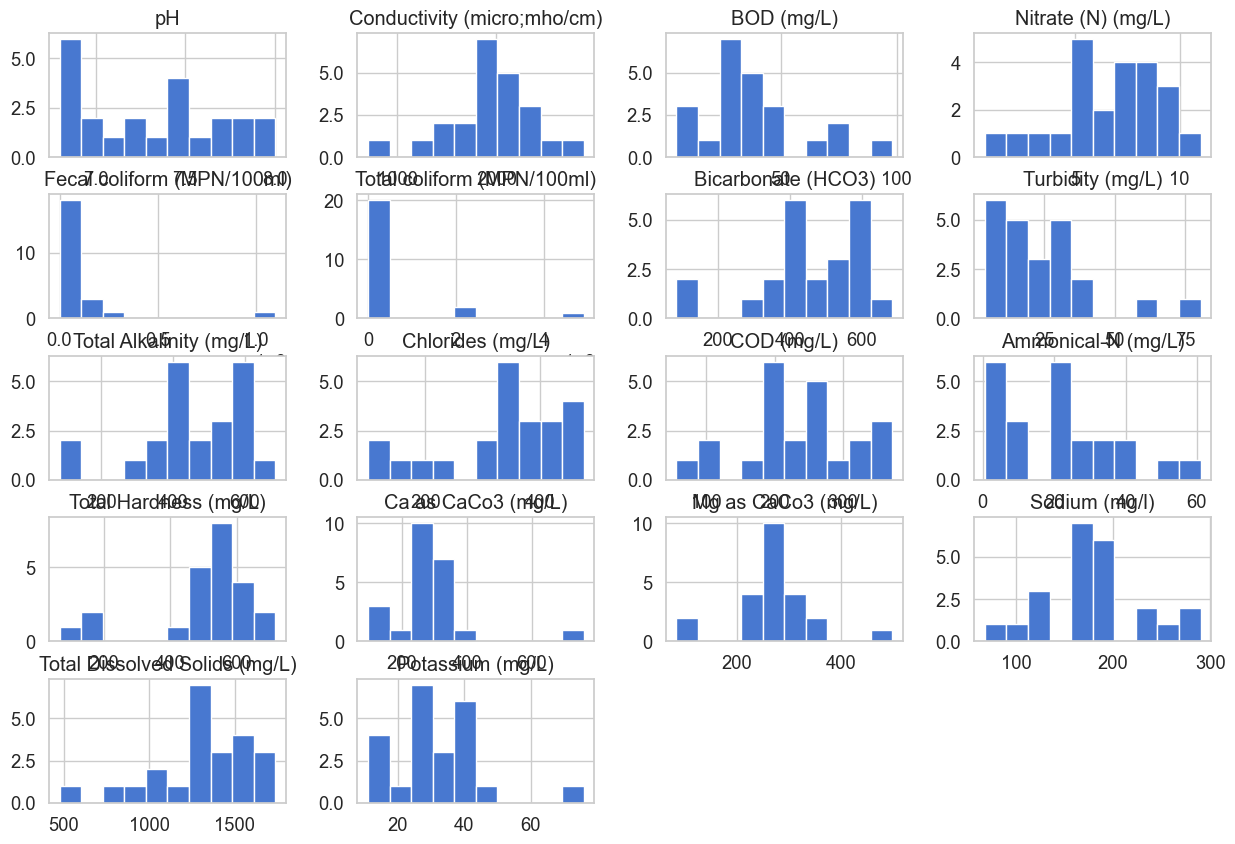

In [35]:
# histograms 
df.hist(figsize=(15,10))
plt.show()

In [36]:
num_df = df.select_dtypes(include=["int64", "float64"])

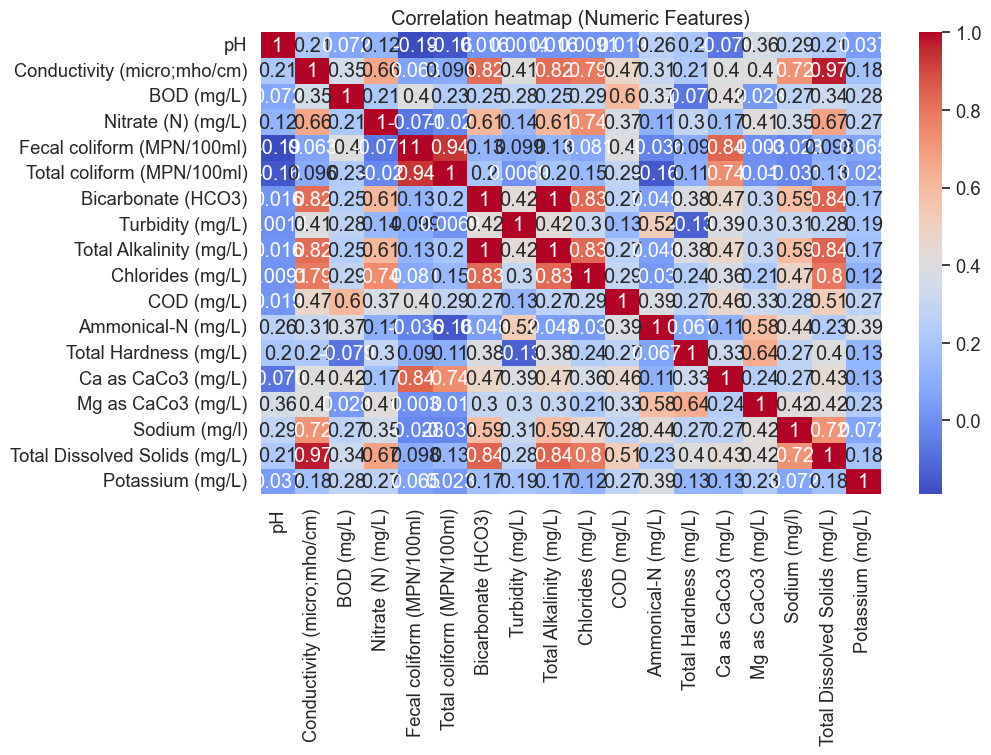

In [37]:
# correlation
plt.figure(figsize=(10,6))
sns.heatmap(num_df.corr(), annot=True,cmap="coolwarm")
plt.title("Correlation heatmap (Numeric Features)")
plt.show()

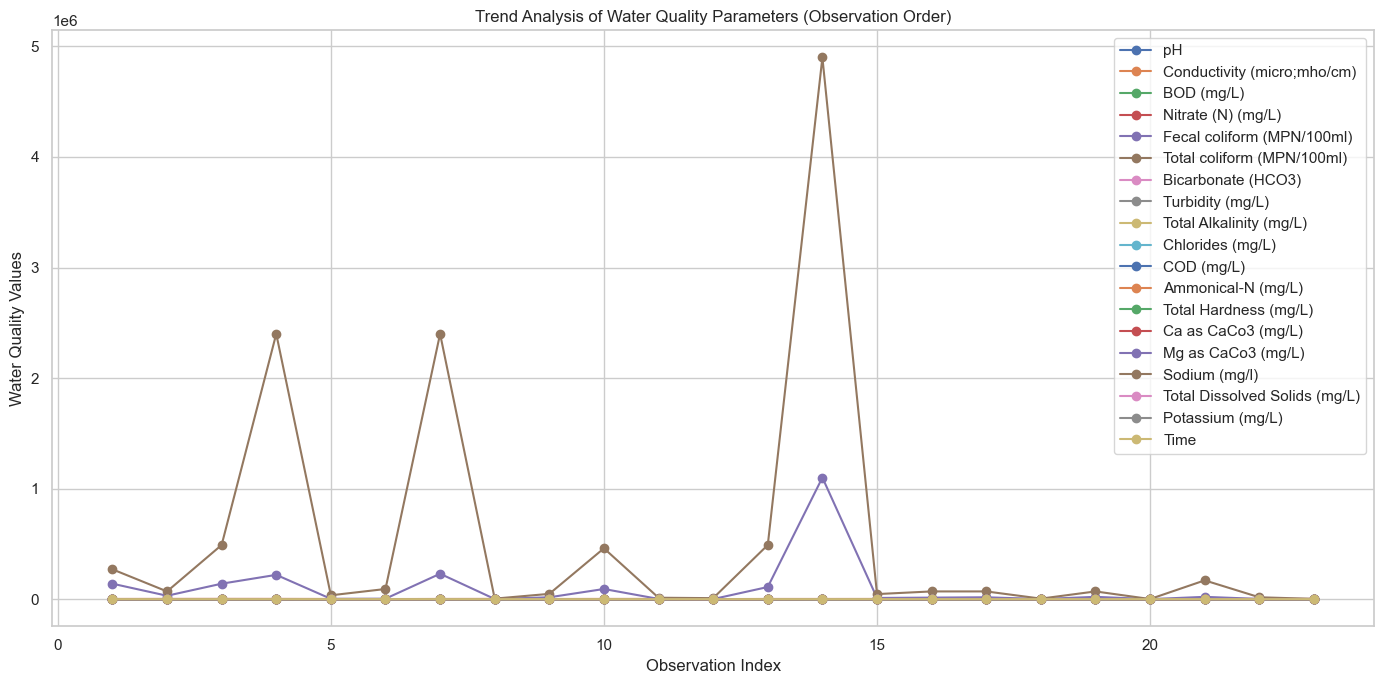

✅ Trend plot saved as: outputs/water_quality_trends.png


In [51]:
# ==========================================
# Trend Analysis (No Time Column Available)
# ==========================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# ----------------
# Plot style
# ----------------
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (14, 7)

# ----------------
# Create observation index (PROFESSIONAL WAY)
# ----------------
df = df.reset_index(drop=True)
df["Observation_Index"] = df.index + 1

# ----------------
# Select numeric water quality parameters
# ----------------
features = df.select_dtypes(include="number").columns.tolist()
features.remove("Observation_Index")

# ----------------
# Plot trends
# ----------------
plt.figure()

for col in features:
    plt.plot(df["Observation_Index"], df[col], marker="o", label=col)

plt.xlabel("Observation Index")
plt.ylabel("Water Quality Values")
plt.title("Trend Analysis of Water Quality Parameters (Observation Order)")
plt.legend()
plt.grid(True)
plt.tight_layout()

# ----------------
# Save output
# ----------------
os.makedirs("../outputs", exist_ok=True)
plt.savefig("../outputs/water_quality_trends.png", dpi=300)
plt.show()

print("✅ Trend plot saved as: outputs/water_quality_trends.png")